<a href="https://colab.research.google.com/github/digitalfabrikruhr/testApp4/blob/main/Workshop_NeuronaleNetze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Projektideen_Tabelle_aktualisiert.csv to Projektideen_Tabelle_aktualisiert.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot


In [ ]:
import keras
print(keras.backend.backend())


tensorflow


In [ ]:
#Laden des Datensatzes
data = pd.read_csv("Projektideen_Tabelle_aktualisiert.csv")
print(type(data))
data.head()
print(data.ndim)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
2
(15, 7)


In [ ]:
#Features und Labels definieren
features = data[["TEMPF","PULSE","RESPR","BPSYS","BPDIAS","POPCT"]]
label = data["SCORE"]

print(type(features))
print(type(label))


#Daten in Trainings- und Testsets aufteilen

train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size= 0.2, random_state= 0)

print(features.shape)
print(features.ndim)
print("")
print(label.shape)
print(label.ndim)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(79540, 6)
2

(79540,)
1


In [ ]:
#Merkmale normalisieren
scalar = StandardScaler()
train_features = scalar.fit_transform(train_features)
test_features = scalar.transform(test_features)

In [ ]:
#Modell aufstellen
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=train_features.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [ ]:
# Modell kompilieren
 #model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
from keras.optimizers import SGD
model.compile(optimizer= SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from urllib.request import urlopen
exec(urlopen("http://colab-monitor.smankusors.com/track.py").read())
_colabMonitor = ColabMonitor().start()

Now live at : http://colab-monitor.smankusors.com/6665d79cf1506


In [ ]:
# Modell trainieren
history = model.fit(train_features, train_labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1591/1591 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.0153 - val_accuracy: 0.9959
Epoch 2/5
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.0160 - val_accuracy: 0.9956
Epoch 3/5
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.0150 - val_accuracy: 0.9969
Epoch 4/5
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.0144 - val_accuracy: 0.9965
Epoch 5/5
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0149 - val_accuracy: 0.9958


In [ ]:
# Modell bewerten
# loss, accuracy = model.evaluate(test_features, test_labels)
# print('Test Accuracy:', accuracy)

loss, test_accuracy = model.evaluate(test_features, test_labels)
print('Test Accuracy:', test_accuracy)

498/498 [==============================] - 1s 1ms/step - loss: 0.0344 - accuracy: 0.9881
Test Accuracy: 0.9881191849708557


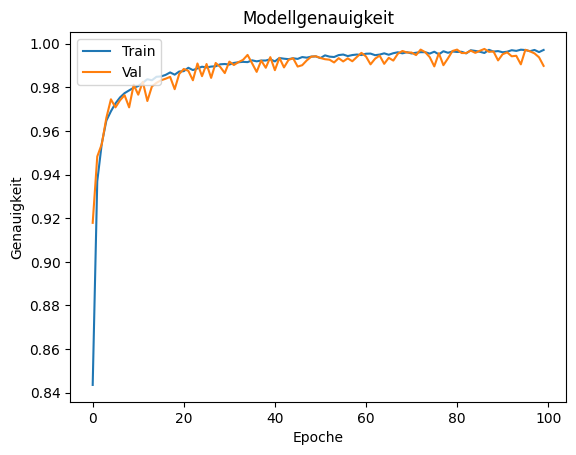

In [ ]:
# Trainingsverlauf plotten
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modellgenauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Epoche')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()